## Definición del Problema y Objetivos

### Definición del Problema
En el dataset **Video Game Sales with Ratings** https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/data contiene datos sobre las ventas  de videojuegos en diferentes regiones del mundo que se han hecho hasta el año 2020, con información sobre el género, plataforma, año de lanzamiento de cada juego, entre otros. El problema a resolver es predecir las ventas globales de videojuegos basándose en sus características.

Dado un conjunto de características de videojuegos, como la plataforma, el género, el año de lanzamiento y las ventas en diferentes regiones, ¿cómo podemos predecir las ventas globales de cada videojuego con la mayor precisión posible?

Las ventas globales de videojuegos pueden ser influenciadas por una variedad de factores, incluyendo el género del juego, la plataforma en la que se lanzó, y las ventas en diferentes regiones. Comprender estas relaciones puede ayudar a las empresas a tomar decisiones informadas sobre futuras inversiones y estrategias de marketing.

### Objetivos del Proyecto
Desarrollar un modelo predictivo que pueda estimar las ventas globales de videojuegos basándose en las características disponibles en el dataset.

**Objetivos Específicos:**

**1. Explorar y Analizar los Datos:**

- Realizar un análisis inicial para comprender la distribución de las ventas y las características de los videojuegos.
- Identificar patrones y tendencias en los datos, como la influencia del año de lanzamiento, la plataforma, o el género en las ventas globales.
    
**2. Preparar los Datos:**

- Tratar valores faltantes, duplicados y errores en los datos para asegurar la calidad del dataset.
- Convertir las variables categóricas en un formato adecuado para el modelo (por ejemplo, codificación one-hot para plataformas y géneros).

**3. Desarrollar el Modelo Predictivo:**

- Elegir un modelo de machine learning adecuado para la tarea de regresión (por ejemplo, regresión lineal).
- Dividir los datos en conjuntos de entrenamiento y prueba, y entrenar el modelo con el conjunto de entrenamiento.
- Medir el rendimiento del modelo utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para evaluar su capacidad predictiva.

**4. Visualizar y Presentar Resultados:**

- Crear gráficos que muestren la precisión del modelo y la relación entre las características de los videojuegos y las ventas globales.
- Interpretar los resultados del modelo para comprender cuáles características tienen más impacto en las ventas globales.

**Conclusiones y Recomendaciones:**

- Resumir los hallazgos clave sobre los factores que influyen en las ventas de videojuegos.
- Proporcionar recomendaciones basadas en el modelo para estrategias futuras en el desarrollo y marketing de videojuegos.

**Preguntas Clave que el Proyecto Buscará Responder**

1. ¿Qué características de los videojuegos tienen una mayor influencia en las ventas globales?
2. ¿Cómo afecta el año de lanzamiento a las ventas globales de videojuegos?
3. ¿Qué plataformas tienen el mayor impacto en las ventas globales?
4. ¿Es posible predecir las ventas globales de videojuegos con una precisión aceptable utilizando el dataset disponible?

## Imports

In [1]:
# Análisis de datos
import pandas as pd

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning - Modelos de regresión
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Utilidades para la división de datos y evaluación de modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Guardado y carga de modelos entrenados
import joblib

## Definición de los Datos y Carga

### Definición de los Datos a Obtener

Para el proyecto de predicción de ventas globales de videojuegos, vamos a trabajar con el dataset **Video Game Sales with Ratings**. Aquí están los detalles de las columnas disponibles y qué representa cada una:

- `Name`: Nombre del videojuego.
- `Platform`: Plataforma en la que se lanzó el videojuego (por ejemplo, PS4, Xbox One, PC).
- `Year_of_Release`: Año de lanzamiento del videojuego.
- `Genre`: Género del videojuego (por ejemplo, Acción, Aventura, Deportes).
- `Publisher`: Publicador del videojuego.
- `NA_Sales`: Ventas en Norteamérica (en millones de unidades).
- `EU_Sales`: Ventas en Europa (en millones de unidades).
- `JP_Sales`: Ventas en Japón (en millones de unidades).
- `Other_Sales`: Ventas en otras regiones (en millones de unidades).
- `Global_Sales`: Ventas globales (en millones de unidades), que es la variable que queremos predecir.
- `Critic_Score`: Puntuación del personal de Metacritic.
- `Critic_Count`: Número del personal de Metracritic que ha puntuado.
- `User_Score`: Puntuación por los usuarios.
- `User_Count`: Número de usuarios que han puntuado.
- `Developer`: Responsable de crear el juego.
- `Rating`: Clasificación ESRB (Entertainment Software Rating Board)

### Carga de los Datos

In [2]:
file_path  = './vgsales.csv'

# Cargar el dataset en un DataFrame
vgsales_df = pd.read_csv(file_path)

# Copia del DataFrame "vgsales_df"
vgsales_df_original = vgsales_df.copy()

# Mostrar las primeras filas del DataFrame
print("> Mostrar las primeras filas del DataFrame")
print(vgsales_df.head(), "\n")

# Mostrar información general del DataFrame
print("> Mostrar información general del DataFrame")
print(vgsales_df.info(), "\n")

# Mostrar estadísticas descriptivas para entender la distribución de los datos
print("> Mostrar estadísticas descriptivas para entender la distribución de los datos")
print(vgsales_df.describe(include='all'), "\n")

# Mostrar títulos de las columnas
print("> Mostrar títulos de las columnas")
print(vgsales_df.columns.values)   

> Mostrar las primeras filas del DataFrame
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Cou

## Limpieza y Preparación de los Datos

### Identificación y Tratamiento de Valores Faltantes
Vamos a identificar si hay valores faltantes en el dataset y decidir cómo tratarlos.

In [3]:
# Verificar valores faltantes en el DataFrame
missing_values = vgsales_df.isnull().sum()
print("> Valores faltantes en cada columna")
print(missing_values[missing_values > 0])


> Valores faltantes en cada columna
Name                  2
Year_of_Release     269
Genre                 2
Publisher            54
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


Al verificar los datos podemos ver que valores que faltan, como: 

- `Name`: El nombre del videojuego es crucial, pero si sólo hay 2 valores faltantes, se podría considerar eliminar esas filas.
- `Year_of_Release`: La fecha de lanzamiento es importante para el análisis temporal. Para los 269 valores faltantes:
    - Opción A: Rellenar con el año de lanzamiento más frecuente.
    - Opción B: Rellenar con una aproximación basada en otros atributos, como la plataforma o el género.
- `Genre`: Solo 2 valores faltantes, se puede rellenar con el género más frecuente o usar un valor específico como 'Unknown'.
- `Publisher`: 54 valores faltantes. Rellenar con el valor más frecuente o con 'Unknown'.
- `Critic_Score` y `Critic_Count`: 8582 valores faltantes. Ambos tienen muchos valores faltantes. Se puede considerar:
    - Rellenar con la mediana o la media si no hay un patrón claro.
    - Opción Alternativa: Rellenar utilizando técnicas de aprendizaje automático si hay suficiente correlación con otras características.
- `User_Score` y `User_Count`: 6704 valores faltantes. Rellenar de manera similar a Critic_Score y Critic_Count.
- `Developer`: 6623 valores faltantes. Puedes rellenar con 'Unknown' o con el valor más frecuente si se puede determinar.
- `Rating`: 6769 valores faltantes. Rellenar con 'Unknown' o el valor más frecuente si hay datos suficientes.

In [4]:
# Rellenar valores faltantes en 'Name' (opcional)
vgsales_df = vgsales_df.dropna(subset=['Name'])  # Eliminar filas con valores faltantes en 'Name'

# Rellenar valores faltantes en 'Year_of_Release' con el año de lanzamiento más frecuente
most_frequent_year = vgsales_df['Year_of_Release'].mode()[0]
vgsales_df['Year_of_Release'].fillna(most_frequent_year, inplace=True)

# Rellenar valores faltantes en 'Genre' con el genero más frecuente
most_frequent_genre = vgsales_df['Genre'].mode()[0]
vgsales_df['Genre'].fillna(most_frequent_genre, inplace=True)

# Rellenar valores faltantes en 'Publisher' con el publisher más frecuente
most_frequent_publisher = vgsales_df['Publisher'].mode()[0]
vgsales_df['Publisher'].fillna(most_frequent_publisher, inplace=True)

# Reemplazar valores no numéricos en 'User_Score' con NaN
vgsales_df['User_Score'] = pd.to_numeric(vgsales_df['User_Score'], errors='coerce')

# Verificar valores no numéricos en 'Critic_Score' y 'Critic_Count'
vgsales_df['Critic_Score'] = pd.to_numeric(vgsales_df['Critic_Score'], errors='coerce')
vgsales_df['Critic_Count'] = pd.to_numeric(vgsales_df['Critic_Count'], errors='coerce')

# Rellenar valores faltantes en 'User_Score', 'Critic_Score', 'Critic_Count' y 'User_Count'
vgsales_df['User_Score'].fillna(vgsales_df['User_Score'].median(), inplace=True)
vgsales_df['Critic_Score'].fillna(vgsales_df['Critic_Score'].median(), inplace=True)
vgsales_df['Critic_Count'].fillna(vgsales_df['Critic_Count'].median(), inplace=True)
vgsales_df['User_Count'].fillna(vgsales_df['User_Count'].median(), inplace=True)

# Rellenar valores faltantes en columnas categóricas
vgsales_df['Developer'].fillna('Unknown', inplace=True)
vgsales_df['Rating'].fillna('Unknown', inplace=True)

# Rellenar valores faltantes en 'Year_of_Release', 'Genre', y 'Publisher'
most_frequent_year = vgsales_df['Year_of_Release'].mode()[0]
vgsales_df['Year_of_Release'].fillna(most_frequent_year, inplace=True)
most_frequent_genre = vgsales_df['Genre'].mode()[0]
vgsales_df['Genre'].fillna(most_frequent_genre, inplace=True)
most_frequent_publisher = vgsales_df['Publisher'].mode()[0]
vgsales_df['Publisher'].fillna(most_frequent_publisher, inplace=True)

# Rellenar valores copia de vgsales
vgsales_df_original['User_Score'] = pd.to_numeric(vgsales_df_original['User_Score'], errors='coerce')
vgsales_df_original['Critic_Score'] = pd.to_numeric(vgsales_df_original['Critic_Score'], errors='coerce')
vgsales_df_original['Critic_Count'] = pd.to_numeric(vgsales_df_original['Critic_Count'], errors='coerce')
vgsales_df_original['User_Score'].fillna(vgsales_df_original['User_Score'].median(), inplace=True)
vgsales_df_original['Critic_Score'].fillna(vgsales_df_original['Critic_Score'].median(), inplace=True)
vgsales_df_original['Critic_Count'].fillna(vgsales_df_original['Critic_Count'].median(), inplace=True)
vgsales_df_original['User_Count'].fillna(vgsales_df_original['User_Count'].median(), inplace=True)

# Verificar que no queden valores faltantes
missing_values_after = vgsales_df.isnull().sum()
print("> Valores faltantes después de limpiar")
print(missing_values_after[missing_values_after > 0])

# Verificar el DataFrame después de rellenar y limpiar
print("> Primeras filas del DataFrame después de limpiar")
print(vgsales_df.head(), "\n")

# Información del DataFrame
print("> Información general del DataFrame después de limpiar")
print(vgsales_df.info())

> Valores faltantes después de limpiar
Series([], dtype: int64)
> Primeras filas del DataFrame después de limpiar
                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24          71.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.

## Exploración de los Datos y Observaciones

### Estadísticas Descriptivas
Las estadísticas descriptivas proporcionan un resumen de las características principales de los datos. Incluyen medidas como la media, mediana, desviación estándar, mínimo, máximo y cuartiles para columnas numéricas. Para columnas categóricas, muestran la frecuencia de cada categoría.

- Calcular medidas estadísticas básicas para las columnas numéricas, como Global_Sales y Critic_Score, para entender cómo se distribuyen los valores.
- Revisar la distribución de categorías para columnas como Genre y Rating, para ver qué categorías son más comunes.

El objetivo de este análisis es entender las características básicas de los datos, identificar posibles valores atípicos o anomalías, y obtener una visión general de la distribución de los datos.

In [5]:
# Estadísticas descriptivas para columnas numéricas
print("> Estadísticas descriptivas para columnas numéricas")
print(vgsales_df.describe())

# Estadísticas descriptivas para columnas categóricas
print("> Estadísticas descriptivas para columnas categóricas")
print(vgsales_df.describe(include=[object]))

> Estadísticas descriptivas para columnas numéricas
       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16717.000000  16717.000000  16717.000000  16717.000000   
mean       2006.513310      0.263255      0.145010      0.077610   
std           5.833087      0.813475      0.503303      0.308836   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2008.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  16717.000000  16717.000000  16717.000000  16717.000000  16717.00000   
mean       0.047333      0.533462     70.010767     23.609380      7.32976   
std        0.186721      1.547956      9.776915     13.510184      1.02779   
min        0.000000    

#### Conclusiones de las Estadísticas Descriptivas
- La media del año de lanzamiento es 2006, lo que indica que la mayoría de los videojuegos en el dataset se lanzaron en los últimos años. Hay una desviación estándar considerable, sugiriendo una amplia gama de años de lanzamiento, desde 1980 hasta 2020.
- Las ventas en América del Norte (NA_Sales) tienen una media baja, pero la desviación estándar es alta, indicando que hay una gran variabilidad en las ventas, con algunos videojuegos generando ventas muy altas.
- Las ventas en Japón (JP_Sales) son las más bajas en comparación con otras regiones, con una alta variabilidad en las ventas.
- Las ventas en otras regiones son bajas en promedio y también muestran una alta variabilidad.
- Las ventas globales tienen una media de 0.533, pero con una desviación estándar alta, lo que indica que hay una gran variabilidad en las ventas globales. Algunos videojuegos tienen ventas extremadamente altas.
- La puntuación de críticos es generalmente alta, con una media de 70.01, pero con una desviación estándar considerable, sugiriendo que hay una variabilidad significativa en las críticas de los videojuegos.
- La cantidad de críticos que evalúan un videojuego varía considerablemente, con una media de 23.61 pero una desviación estándar alta.
- La puntuación de usuarios tiene una media de 7.33, indicando que los usuarios en promedio valoran los videojuegos de manera positiva, aunque hay una variabilidad en las puntuaciones.
- La cantidad de usuarios que puntuaron un videojuego varía ampliamente, con una media de 86.76 y una desviación estándar alta. Esto sugiere que algunos videojuegos reciben muchas más reseñas que otros.
- La columna `Name` tiene una gran cantidad de videojuegos únicos, lo que indica diversidad en los títulos.
- Hay 31 plataformas diferentes, con la PS2 siendo la más común en el dataset.
- Existen 12 géneros diferentes, con el género "Action" siendo el más frecuente.

### Distribución de Ventas Globales
Este análisis examina cómo se distribuyen las ventas globales de los videojuegos en tu dataset. Utilizaré un histograma para visualizar la frecuencia de diferentes rangos de ventas globales.

El objetivo es determinar si la mayoría de los videojuegos tienen ventas globales bajas, medias o altas, y si hay valores atípicos o extremos que podrían influir en el análisis.

In [6]:
# Calcular estadísticas descriptivas de ventas globales
global_sales_stats = vgsales_df['Global_Sales'].describe()

# Mostrar estadísticas descriptivas para ventas globales
print("> Estadísticas descriptivas para ventas globales")
print(global_sales_stats, "\n")

# Mostrar el resumen de ventas globales
print("> Distribución de Ventas Globales")
print(vgsales_df['Global_Sales'].value_counts(bins=10, sort=False))

> Estadísticas descriptivas para ventas globales
count    16717.000000
mean         0.533462
std          1.547956
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.530000
Name: Global_Sales, dtype: float64 

> Distribución de Ventas Globales
(-0.0735, 8.262]    16636
(8.262, 16.514]        58
(16.514, 24.766]       13
(24.766, 33.018]        7
(33.018, 41.27]         2
(41.27, 49.522]         0
(49.522, 57.774]        0
(57.774, 66.026]        0
(66.026, 74.278]        0
(74.278, 82.53]         1
Name: Global_Sales, dtype: int64


#### Conclusiones de la Distribución de Ventas Globales
**Estadísticas Descriptivas**
- 0.533 millones de unidades. La mayoría de los videojuegos tienen ventas globales menores a 1 millón de unidades.
- 1.548 millones de unidades. La alta desviación estándar indica que hay una gran variabilidad en las ventas globales.
- 0.01 millones de unidades. Esto sugiere que algunos videojuegos tienen ventas muy bajas.
- 0.06 millones de unidades. El 25% de los videojuegos tienen ventas menores o iguales a 0.06 millones.
- 0.17 millones de unidades. La mediana es bastante baja, indicando que la mayoría de los videojuegos tienen ventas globales por debajo de 0.17 millones.
- 0.47 millones de unidades. El 75% de los videojuegos tienen ventas menores o iguales a 0.47 millones.
- 82.53 millones de unidades. Este valor extremo indica que algunos videojuegos han tenido ventas globales muy altas.

**Conclusiones**
- La distribución de las ventas globales muestra un sesgo considerable. La gran mayoría de los juegos tienen ventas muy bajas, mientras que un pequeño número de juegos genera la mayoría de las ventas globales.
- Solo un juego tiene ventas en el rango más alto, mientras que la mayoría se agrupa en el rango más bajo. Esto refuerza la idea de que el mercado de videojuegos es altamente concentrado, con unos pocos títulos dominando en ventas.
- La desviación estándar alta indica que las ventas globales son muy variables. Algunos juegos generan ingresos mucho mayores que otros, lo que puede deberse a factores como la popularidad, la calidad del juego, o el marketing.
- La mayoría de los juegos tienen ventas que están por debajo de la media. Esto puede ser indicativo de la necesidad de estrategias efectivas de marketing y calidad de juego para destacar en un mercado saturado.
- Los desarrolladores y editores deben considerar los factores que pueden llevar a altas ventas, como la plataforma, el género, la promoción y las críticas. Enfocarse en estos aspectos puede ayudar a mejorar las probabilidades de éxito comercial.

### Ventas por Plataforma
Este análisis compara las ventas globales entre diferentes plataformas de videojuegos. Utilizaré un gráfico de barras para mostrar la distribución de ventas globales para cada plataforma.

El objetivo es Identificar qué plataformas tienen las mayores y menores ventas globales y observar la variabilidad de ventas dentro de cada plataforma.

In [7]:
# Agrupar por plataforma y calcular las ventas globales totales por plataforma
platform_sales = vgsales_df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

print("> Estadísticas descriptivas para ventas por plataforma")
print(platform_sales.describe(), "\n")

# Mostrar las ventas globales totales por plataforma
print("> Ventas globales totales por plataforma")
print(platform_sales)

> Estadísticas descriptivas para ventas por plataforma
count      31.000000
mean      287.673548
std       348.274413
min         0.030000
25%        22.165000
50%       200.050000
75%       304.265000
max      1255.640000
Name: Global_Sales, dtype: float64 

> Ventas globales totales por plataforma
Platform
PS2     1255.64
X360     971.63
PS3      939.43
Wii      908.13
DS       807.10
PS       730.68
GBA      318.50
PS4      314.23
PSP      294.30
PC       260.30
3DS      259.09
XB       258.26
GB       255.45
NES      251.07
N64      218.88
SNES     200.05
GC       199.36
XOne     159.44
2600      97.08
WiiU      82.16
PSV       54.12
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64


#### Conclusiones de las Ventas por Plataforma
**Estadísticas Descriptivas**
- La media de las ventas globales por plataforma es de aproximadamente 287.67 millones de unidades. Esto indica que, en promedio, cada plataforma ha generado cerca de 287.67 millones de unidades en ventas globales.
- La desviación estándar es de 348.27 millones de unidades, lo que muestra una gran variabilidad en las ventas entre plataformas. Algunas plataformas tienen ventas muy altas, mientras que otras tienen ventas mucho más bajas.
- El valor mínimo de ventas globales es de 0.03 millones de unidades. Esto indica que algunas plataformas tienen ventas globales extremadamente bajas.
- El 25% de las plataformas tienen ventas globales menores o iguales a 22.17 millones de unidades.
- La mediana es de 200.05 millones de unidades, lo que sugiere que la mitad de las plataformas tienen ventas menores o iguales a esta cifra.
- El 75% de las plataformas tienen ventas menores o iguales a 304.27 millones de unidades.

**Conclusiones**
- La plataforma con mayores ventas globales ha alcanzado 1255.64 millones de unidades, mostrando que hay plataformas con ventas extremadamente altas en comparación con otras.
- Las plataformas con mayores ventas globales son PS2, X360, PS3, Wii, y DS. La PS2 lidera con 1255.64 millones de unidades, seguida por la X360, PS3, y Wii, todas con ventas superiores a los 900 millones de unidades.
- Las plataformas con ventas globales más bajas incluyen el PCFX, GG, 3DO, TG16, y otros modelos antiguos o menos conocidos, con ventas globales que apenas alcanzan una fracción de las más exitosas.

### Ventas por Año de Lanzamiento
Este análisis examina cómo han cambiado las ventas globales a lo largo de los años. Utilizaré un gráfico de líneas para mostrar la tendencia de las ventas globales promedio por año.

El objetivo es observar si hay tendencias en las ventas globales a lo largo del tiempo, como aumentos o disminuciones en ciertos períodos, y entender cómo el mercado de videojuegos ha evolucionado.

In [8]:
# Agrupar por año de lanzamiento y calcular las ventas globales totales por año
yearly_sales = vgsales_df.groupby('Year_of_Release')['Global_Sales'].sum().sort_index()

# Mostrar estadísticas descriptivas para ventas por año
print("> Estadísticas descriptivas para ventas por año de lanzamiento")
print(yearly_sales.describe(), "\n")

# Mostrar las ventas globales totales por año de lanzamiento
print("> Ventas globales totales por año de lanzamiento")
print(yearly_sales, "\n")

> Estadísticas descriptivas para ventas por año de lanzamiento
count     39.000000
mean     228.663590
std      215.141924
min        0.060000
25%       46.600000
50%      199.150000
75%      359.520000
max      770.750000
Name: Global_Sales, dtype: float64 

> Ventas globales totales por año de lanzamiento
Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     45.98
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    770.75
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global

#### Conclusiones de las Ventas por Año de Lanzamiento
**Estadísticas Descriptivas**
- La media de las ventas globales por año de lanzamiento es de aproximadamente 228.66 millones de unidades. Esto indica que, en promedio, los videojuegos lanzados en un año determinado generaron cerca de 228.66 millones de unidades en ventas globales.
- La desviación estándar es de 215.14 millones de unidades, lo que refleja una gran variabilidad en las ventas globales de los videojuegos a lo largo de los años. Algunos años muestran ventas mucho mayores que otros.
- El valor mínimo de ventas globales es de 0.06 millones de unidades, lo que indica que algunos años tuvieron ventas globales muy bajas.
- El 25% de los años tienen ventas globales menores o iguales a 46.60 millones de unidades.
- La mediana es de 199.15 millones de unidades, lo que sugiere que la mitad de los años tuvieron ventas menores o iguales a esta cifra.
- El 75% de los años tienen ventas menores o iguales a 359.52 millones de unidades.
- El año con mayores ventas globales ha alcanzado 770.75 millones de unidades, mostrando que algunos años tuvieron ventas significativamente altas.

**Conclusiones**
- Las ventas globales muestran una tendencia creciente desde los años 80 hasta principios de 2010. Los picos más altos se observan alrededor de 2008 y 2009, con ventas que alcanzan más de 600 millones de unidades. Estos años representan el auge de las ventas globales en la industria de los videojuegos.
- Desde mediados de la década de 1990, las ventas globales comienzan a aumentar notablemente. Esto puede estar relacionado con la introducción de nuevas consolas y un crecimiento general en la popularidad de los videojuegos.
- Después de 2010, hay una caída notable en las ventas globales, con valores que disminuyen considerablemente en años recientes, como 2017 y 2020. Esta disminución puede reflejar cambios en el mercado, saturación de productos o la evolución hacia modelos de negocio diferentes (como juegos en línea).

### Relación entre Puntuación de Críticos y Puntuación de Usuarios

Este análisis explora la relación entre las puntuaciones otorgadas por los críticos y los usuarios para los videojuegos. Utilizaré un diagrama de dispersión para visualizar la correlación entre estas dos variables.
El objetivo es determinar si existe una correlación entre las puntuaciones de críticos y usuarios, lo que podría indicar si un videojuego bien valorado por los críticos también tiende a ser bien valorado por los usuarios, o viceversa.

In [9]:
# Estadísticas descriptivas para Critic Score
print("> Estadísticas descriptivas para Critic Score")
print(vgsales_df['Critic_Score'].describe(), "\n")

# Estadísticas descriptivas para User Score
print("> Estadísticas descriptivas para User Score")
print(vgsales_df['User_Score'].describe())

> Estadísticas descriptivas para Critic Score
count    16717.000000
mean        70.010767
std          9.776915
min         13.000000
25%         71.000000
50%         71.000000
75%         71.000000
max         98.000000
Name: Critic_Score, dtype: float64 

> Estadísticas descriptivas para User Score
count    16717.00000
mean         7.32976
std          1.02779
min          0.00000
25%          7.50000
50%          7.50000
75%          7.50000
max          9.70000
Name: User_Score, dtype: float64


#### Conclusiones de la Relación entre Puntuación de Críticos y Puntuación de Usuarios¶
**Estadísticas Descriptivas**
- La media de las puntuaciones de críticos es 70, lo que indica que, en promedio, los juegos tienen una puntuación positiva, pero no necesariamente excepcional.
- La desviación estándar de 9.78 sugiere una variabilidad moderada en las puntuaciones de los críticos. La mayoría de las puntuaciones se agrupan alrededor de 71, con pocos juegos obteniendo puntuaciones muy bajas o muy altas.
- La mediana y el percentil 25 y 75 son 71, indicando que la mayoría de las puntuaciones están en torno a este valor.
- Las puntuaciones varían de 13 a 98, lo que muestra que hay tanto juegos con críticas muy negativas como muy positivas.
- La media de las puntuaciones de los usuarios es 7.33, que también es positiva, pero en un rango más limitado en comparación con las puntuaciones de los críticos.
- La desviación estándar de 1.03 indica menos variabilidad en las puntuaciones de los usuarios en comparación con las de los críticos.
- La mediana y los percentiles 25 y 75 son 7.50, sugiriendo que la mayoría de los usuarios otorgan puntuaciones en este rango.
- Las puntuaciones de los usuarios van de 0 a 9.7, mostrando una variabilidad considerable, pero en general las puntuaciones son bastante altas, con pocos usuarios otorgando puntuaciones muy bajas.

**Conclusiones**
- En general, se espera que haya una tendencia hacia una relación positiva, donde juegos con altas puntuaciones de críticos también tienden a tener altas puntuaciones de usuarios, aunque la relación no siempre será perfecta.
- Las puntuaciones de los críticos tienden a estar en un rango más amplio con una mayor variabilidad, mientras que las puntuaciones de los usuarios son más consistentes y limitadas.


### Distribución de Géneros de Videojuegos

Este análisis muestra la frecuencia de diferentes géneros de videojuegos en el dataset. Utilizaré un gráfico de barras para visualizar la cantidad de videojuegos en cada género.

El objetivo es identificar qué géneros son más comunes y cuáles tienen menos representación, ayudando a comprender las preferencias del mercado de videojuegos.


In [10]:
# Agrupar por género y contar el número de juegos por género
genre_distribution = vgsales_df['Genre'].value_counts()
print(genre_distribution)

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


#### Conclusiones de la Distribución de Géneros de Videojuegos
**Estadísticas Descriptivas**
- Hay 12 géneros distintos en el conjunto de datos.
- En promedio, hay aproximadamente 1,393 juegos por género.
- La desviación estándar es de aproximadamente 796.50, lo que indica una variabilidad significativa en el número de juegos entre los diferentes géneros.
- El género con la menor cantidad de juegos tiene 580 títulos.
- El 25% de los géneros tiene hasta 867 juegos o menos.
- La mediana es de 1,276 juegos, lo que indica que la mitad de los géneros tienen 1,276 juegos o menos.
- El 75% de los géneros tienen hasta 1,562 juegos o menos.
- El género con la mayor cantidad de juegos tiene 3,370 títulos.

**Conclusiones**
- Los géneros "Action" y "Sports" tienen una representación muy alta en el dataset, lo que indica una alta producción y popularidad de estos géneros en el mercado de videojuegos.
- Hay una buena representación de varios géneros, aunque algunos, como "Puzzle" y "Strategy", tienen menos presencia en comparación con los principales.
- Géneros con menor frecuencia, como "Puzzle" y "Strategy", podrían representar nichos de mercado específicos o categorías menos comunes.

### Distribución de Ratings ESRB
Este análisis examina cómo se distribuyen las clasificaciones ESRB de los videojuegos. Utilizaré un gráfico de barras para mostrar la frecuencia de cada categoría de rating.

El objetivo es ver cómo se distribuyen las clasificaciones de los videojuegos y si ciertas clasificaciones son más comunes que otras.

In [11]:
# Agrupar por rating y contar el número de juegos por rating
rating_distribution = vgsales_df['Rating'].value_counts()
print(rating_distribution)

Unknown    6767
E          3991
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: Rating, dtype: int64


#### Conclusiones de la Distribución de Ratings ESRB
**Estadísticas Descriptivas**
- Con 6,767 juegos, esta categoría tiene la mayor cantidad de títulos. Esto puede deberse a la falta de información de clasificación en el dataset o a la ausencia de una evaluación de rating para esos juegos.
- 3,991 juegos están clasificados como "E para Todos", lo que indica una alta proporción de juegos aptos para todas las edades.
- Con 2,961 juegos clasificados como "T para Adolescentes", este rating es también bastante común, dirigido a adolescentes de 13 años en adelante.
- 1,563 juegos están clasificados como "M para Adultos", lo que sugiere una presencia significativa de contenido dirigido a adultos.
- 1,420 juegos están clasificados como "E10+ para Todos de 10 años en adelante", indicando que una parte considerable de los juegos está dirigida a una audiencia ligeramente mayor que la clasificación "E".
- K-A (Kids to Adults), RP (Rating Pending), AO (Adults Only): Estas categorías tienen muy pocos juegos en comparación con las anteriores, lo que sugiere que son menos comunes en el dataset. En particular, "AO" (Adultos Únicamente) solo tiene un juego, indicando que es extremadamente raro en este conjunto de datos.

**Conclusiones**
- La alta proporción de juegos con rating "Unknown" indica que es un área que podría requerir más atención o limpieza de datos. Los juegos sin una clasificación definida pueden distorsionar el análisis del impacto de los ratings en las ventas.
- Hay una amplia variedad de ratings en el dataset, pero algunos como "AO" son extremadamente raros. Esto puede reflejar las restricciones de mercado para juegos con contenido extremadamente maduro.
- Los ratings "E" y "T" son los más comunes, lo que sugiere que los juegos en el dataset están orientados principalmente a audiencias generales y adolescentes, alineándose con tendencias de mercado más amplias.
- Las categorías como "EC", "K-A", y "RP" tienen muy pocos títulos, lo que podría implicar que estos ratings son menos relevantes en el contexto de los videojuegos en este conjunto de datos.

## Modelo y Justificación


**Objetivo del Modelo:**
- La regresión lineal es adecuada para predecir una variable continua basada en varias características. En este caso, queremos predecir `Global_Sales` basándonos en características como `Year_of_Release`, `NA_Sales`, `EU_Sales`, etc.

**Simplicidad y Interpretabilidad:**
- La regresión lineal es uno de los modelos más sencillos y fáciles de entender, lo cual facilita la interpretación de los resultados.
- Interpretabilidad: Los coeficientes del modelo indican cómo cada característica influye en las ventas globales. Un coeficiente positivo sugiere una relación directa, mientras que un coeficiente negativo sugiere una relación inversa.

**Evaluación del Modelo:**
- Error Cuadrático Medio (MSE): Este valor mide el promedio de los errores cuadrados. Un MSE más bajo indica que el modelo está haciendo mejores predicciones.
- R^2 Score: Este valor indica qué proporción de la variabilidad en la variable objetivo puede ser explicada por las características del modelo. Un R^2 más alto sugiere un mejor ajuste del modelo.

**Preparación de Datos:**
- Las variables categóricas se transforman en variables dummy para que puedan ser utilizadas en la regresión lineal.
- Escalado y Normalización: Hay que asegúrarse de que las características están en una escala comparable, especialmente si se usa modelos más complejos en el futuro.


Comparación de Modelos:
                     Model  Mean Squared Error (MSE)  R^2 Score
0        Linear Regression                  0.000032   0.999992
4            Decision Tree                  0.667259   0.838429
1            Random Forest                  0.740397   0.820719
3      K-Nearest Neighbors                  3.362548   0.185786
2  Support Vector Machines                  3.999947   0.031445


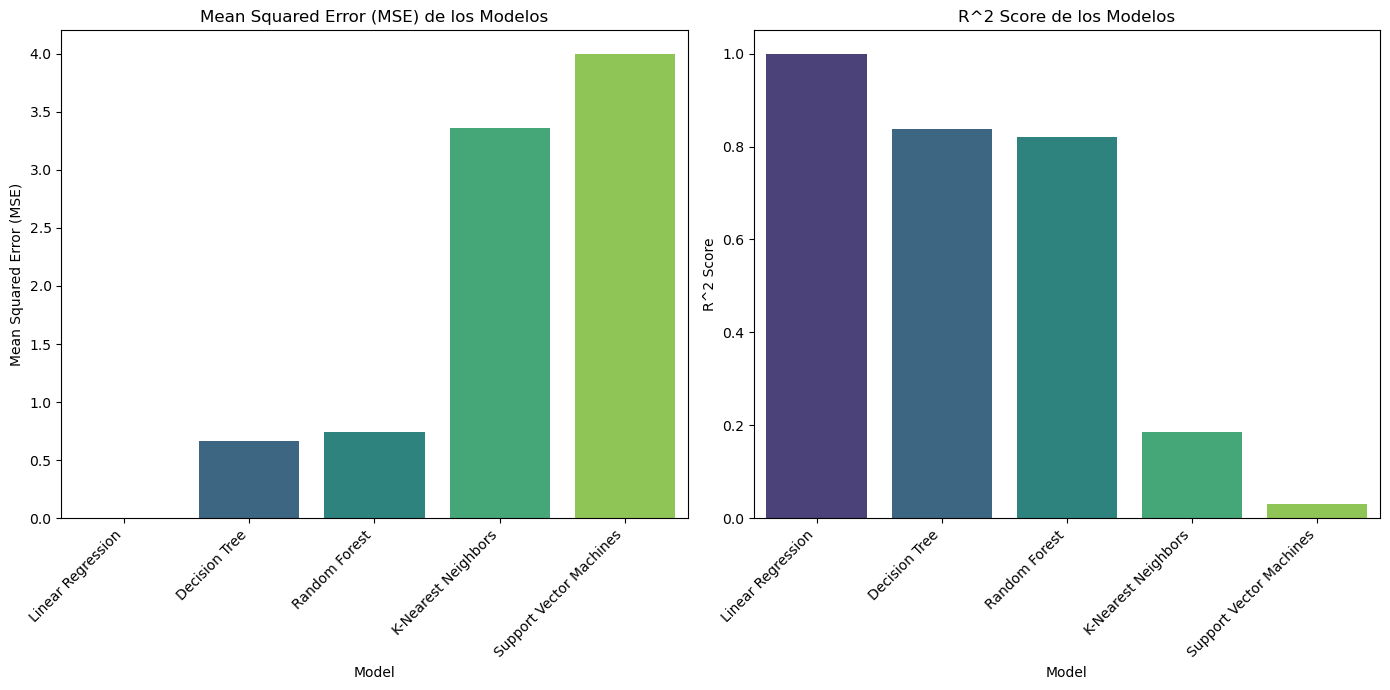

In [12]:
# Transformar variables categóricas en variables dummy
vgsales_df = pd.get_dummies(vgsales_df, columns=['Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], drop_first=True)

# Preparar características y variable objetivo
X = vgsales_df[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'] + \
                [col for col in vgsales_df.columns if col.startswith('Platform_') or col.startswith('Genre_') or col.startswith('Publisher_') or col.startswith('Developer_') or col.startswith('Rating_')]]
y = vgsales_df['Global_Sales']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machines': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results = []

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results.append({
        'Model': model_name,
        'Mean Squared Error (MSE)': mse,
        'R^2 Score': r2
    })

    # Guardar el modelo entrenado
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

# Crear un DataFrame para los resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R^2 Score', ascending=False)

# Exportar los resultados a un archivo CSV
results_df.to_csv('model_evaluation_results.csv', index=False)

print("\nComparación de Modelos:")
print(results_df)

# Visualizar la comparación de modelos
plt.figure(figsize=(14, 7))

# Crear una gráfica de barras para MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Mean Squared Error (MSE)', data=results_df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Mean Squared Error (MSE) de los Modelos')

# Crear una gráfica de barras para R² Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R^2 Score', data=results_df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('R^2 Score de los Modelos')

plt.tight_layout()
plt.show()


### Conclusiones del Modelo a elegir y la Justificación
**Conclusiones**
- La regresión lineal tiene el mejor desempeño entre todos los modelos evaluados. El MSE es extremadamente bajo y el R² Score está muy cerca de 1, lo que indica que el modelo explica casi toda la variabilidad en los datos. Esto sugiere que el modelo se ajusta muy bien a los datos de prueba.
- El árbol de decisión tiene un MSE significativamente mayor que la regresión lineal, pero el R² Score sigue siendo alto, indicando que el modelo aún tiene un buen ajuste y puede explicar una gran parte de la variabilidad en los datos. Sin embargo, el árbol de decisión puede estar sobreajustado o ser menos preciso que la regresión lineal.
- El modelo de Bosque Aleatorio tiene un MSE y un R² Score que son peores que los de la regresión lineal, pero similares al árbol de decisión. Esto sugiere que, aunque Random Forest es robusto y puede manejar datos complejos, en este caso específico, la regresión lineal es más eficaz.
- KNN tiene el mayor MSE y el menor R² Score entre los modelos evaluados. Esto indica que el modelo tiene un ajuste muy pobre y no explica bien la variabilidad en los datos. Podría estar sufriendo de un mal ajuste de los hiperparámetros o ser sensible a las características del conjunto de datos.
- SVM tiene el peor rendimiento en términos de MSE y R² Score. El modelo no parece ajustarse bien a los datos y tiene un ajuste muy pobre, lo que indica que no es adecuado para este conjunto de datos específico.

**Justificación**
- La regresión lineal ha demostrado ser el modelo más adecuado para este conjunto de datos, dado que ofrece el mejor rendimiento tanto en términos de MSE como de R² Score. Esto puede deberse a la naturaleza de los datos y la relación lineal entre las variables independientes y la variable dependiente.
- Aunque los árboles de decisión y los bosques aleatorios ofrecen un rendimiento decente, no son tan efectivos en comparación con la regresión lineal en este caso. Esto puede deberse a que estos modelos, aunque son capaces de capturar relaciones más complejas, pueden haber sobreajustado el modelo a los datos.
- KNN y SVM estos modelos no se ajustaron bien a los datos, lo que sugiere que pueden ser menos adecuados para esta tarea específica. KNN podría estar sobreajustado o mal configurado, y SVM no ha sido capaz de capturar la relación entre las variables de manera efectiva.

Por lo tanto el mejor modelo para este tipo de entrenamiento y datos es **Regresión Lineal** con 0.999992% en R^2 ya que ofrece el mejor desempeño general.

## Representación final de los resultados

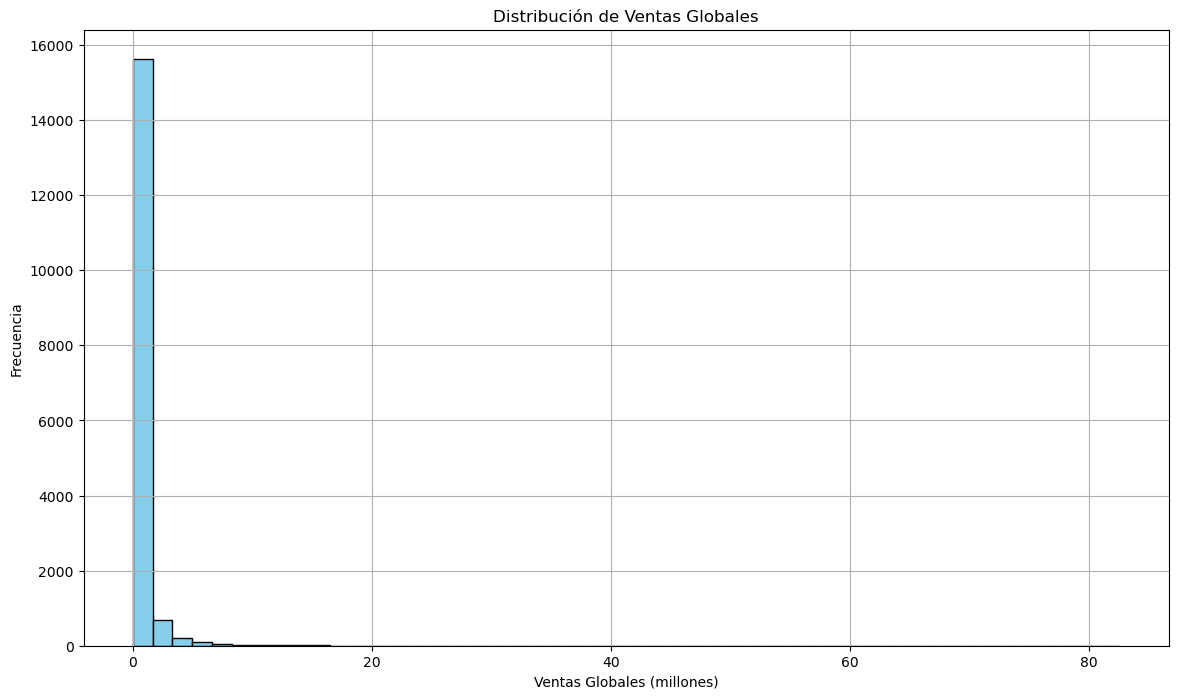

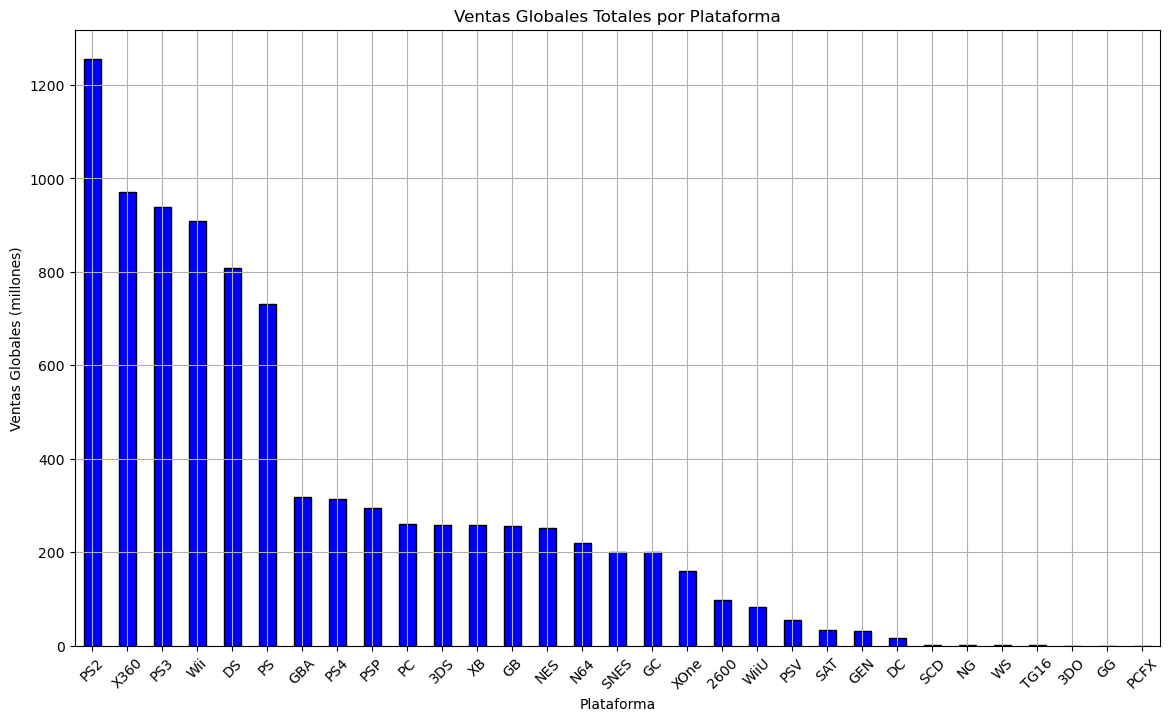

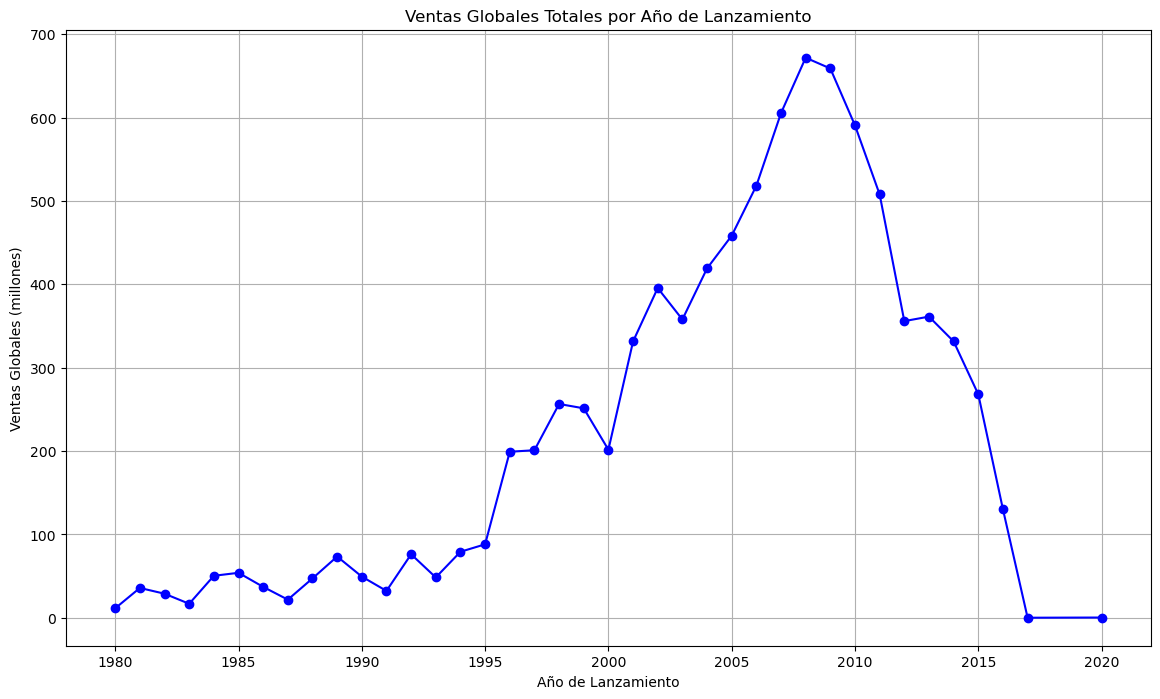

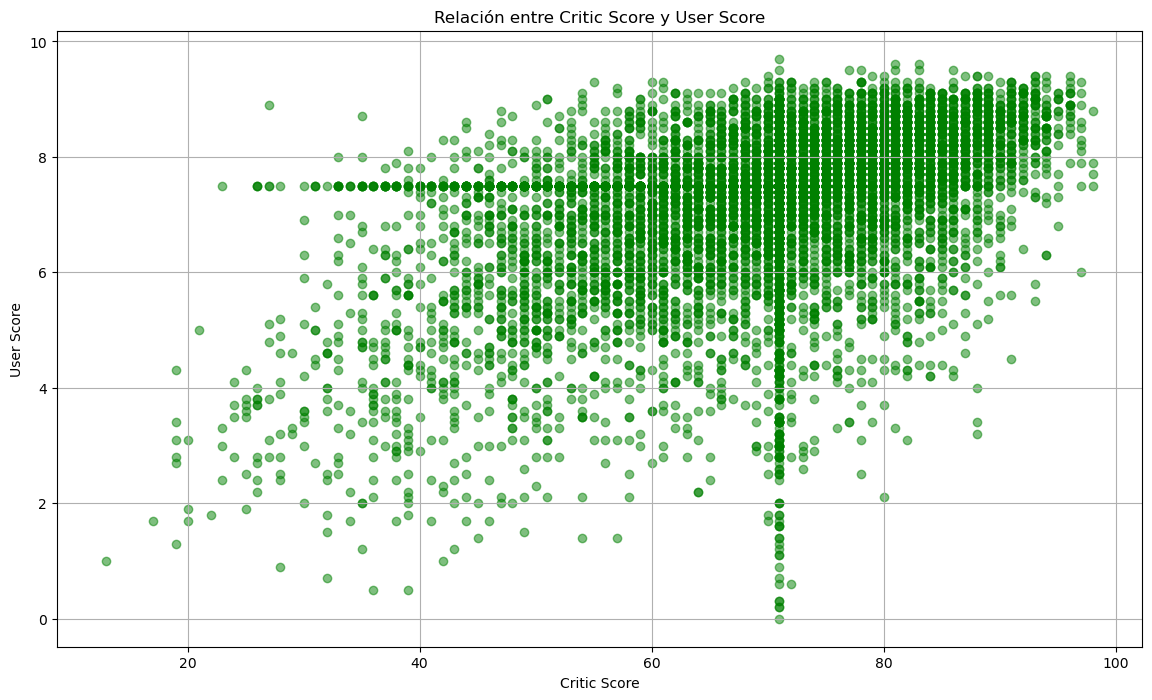

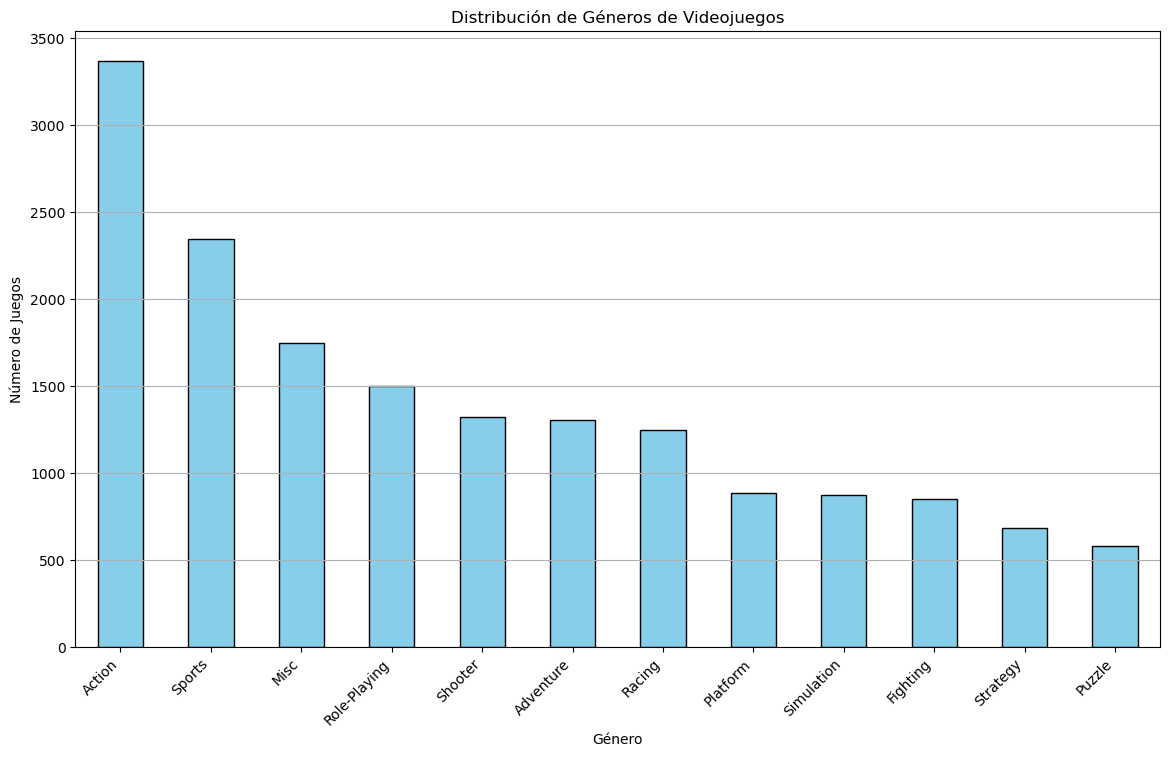

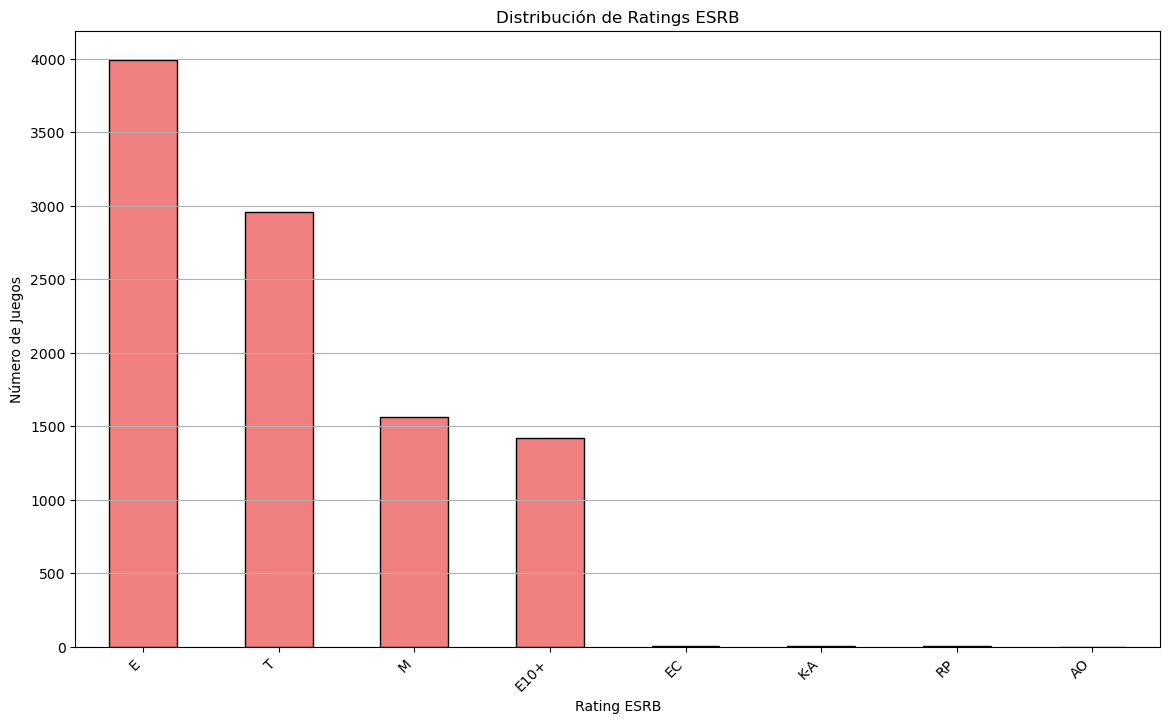

In [13]:
# Crearé un histograma con Global_Sales para ver cómo se agrupan los datos de ventas globales. 
plt.figure(figsize=(14, 8))
vgsales_df_original['Global_Sales'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas Globales')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Crearé un gráfico de barras con Platform en el eje X y Global_Sales en el eje Y. 
# Esto muestra la distribución de ventas para cada plataforma y resalta posibles valores atípicos.
platform_sales = vgsales_df_original.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
platform_sales.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Ventas Globales Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Crearé un gráfico de líneas con Year_of_Release en el eje X 
# y la media de Global_Sales en el eje Y para cada año.
yearly_sales = vgsales_df_original.groupby('Year_of_Release')['Global_Sales'].sum().sort_index()
plt.figure(figsize=(14, 8))
yearly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Ventas Globales Totales por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Globales (millones)')
plt.grid(True)
plt.show()

# Crearé un diagrama de dispersión con Critic_Score en el eje X y User_Score en el eje Y.
plt.figure(figsize=(14, 8))
plt.scatter(vgsales_df_original['Critic_Score'], vgsales_df_original['User_Score'], alpha=0.5, color='green')
plt.title('Relación entre Critic Score y User Score')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid(True)
plt.show()

# Crearé un gráfico de barras con `Genre` en el eje Y 
# y el número de videojuegos en cada género en el eje X.
genre_distribution = vgsales_df_original['Genre'].value_counts()
plt.figure(figsize=(14, 8))
genre_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Géneros de Videojuegos')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

#Crearé un gráfico de barras con Rating en el eje X y el número de videojuegos con cada rating en el eje Y.
rating_distribution = vgsales_df_original['Rating'].value_counts()
plt.figure(figsize=(14, 8))
rating_distribution.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribución de Ratings ESRB')
plt.xlabel('Rating ESRB')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()